In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import os
import warnings
from tqdm import tqdm
# import Counter

%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  
import seaborn as sns

import time
import calendar
import datetime

warnings.filterwarnings("ignore")

bus_bts = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/study_data/229255_bus_riders_at_rush_hour_data/bus_bts.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/study_data/229255_bus_riders_at_rush_hour_data/test.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/study_data/229255_bus_riders_at_rush_hour_data/train.csv')

# location = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/study_data/229255_bus_riders_at_rush_hour_data/행정_법정동 중심좌표.@@')

In [3]:
# 한글폰트 사용 in colab

# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


In [4]:
plt.rcParams["figure.figsize"] = (15, 10)

# #1. EDA

## train 데이터

In [5]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

### <1> datetime

In [ ]:
train['date_dt'] = pd.to_datetime(train['date'], format="%Y-%m-%d")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             415423 non-null  int64         
 1   date           415423 non-null  object        
 2   bus_route_id   415423 non-null  int64         
 3   in_out         415423 non-null  object        
 4   station_code   415423 non-null  int64         
 5   station_name   415423 non-null  object        
 6   latitude       415423 non-null  float64       
 7   longitude      415423 non-null  float64       
 8   6~7_ride       415423 non-null  float64       
 9   7~8_ride       415423 non-null  float64       
 10  8~9_ride       415423 non-null  float64       
 11  9~10_ride      415423 non-null  float64       
 12  10~11_ride     415423 non-null  float64       
 13  11~12_ride     415423 non-null  float64       
 14  6~7_takeoff    415423 non-null  float64       
 15  

#### (1) 주 차

In [ ]:
## 몇 째주인지
week_list = []

for j in range(len(train)):
  date_i = train['date_dt'][j]
  week = date_i.strftime('%W')
  week_list.append(week)

train['Week'] = week_list
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,date_dt,Week
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-01,34
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2019-09-01,34
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2019-09-01,34
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2019-09-01,34
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019-09-01,34


In [ ]:
print(train.Week.nunique(), "주로 이뤄져있음")
print(calendar.month(2019, 9))

6 주로 이뤄져있음
   September 2019
Mo Tu We Th Fr Sa Su
                   1
 2  3  4  5  6  7  8
 9 10 11 12 13 14 15
16 17 18 19 20 21 22
23 24 25 26 27 28 29
30



#### (2) 요일

In [ ]:
## 무슨 요일인지 (월요일 == 0)
weekday_list = []

for i in range(len(train)):
  date_i = train['date_dt'][i]
  weekday = date_i.weekday()
  weekday_list.append(weekday)

train['Weekdays'] = weekday_list
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,date_dt,Week,Weekdays
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-01,34,6
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2019-09-01,34,6
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2019-09-01,34,6
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2019-09-01,34,6
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019-09-01,34,6


In [ ]:
train.groupby('Weekdays')['Weekdays'].count()

Weekdays
0    77452
1    63418
2    61784
3    58981
4    55695
5    45587
6    52506
Name: Weekdays, dtype: int64

In [ ]:
train.groupby(['Weekdays', 'in_out'])['in_out'].count()

Weekdays  in_out
0         시내        76190
          시외         1262
1         시내        62413
          시외         1005
2         시내        60802
          시외          982
3         시내        58030
          시외          951
4         시내        54751
          시외          944
5         시내        44789
          시외          798
6         시내        51525
          시외          981
Name: in_out, dtype: int64

In [ ]:
## 주중과 주말 분류
weekend = train[train['Weekdays'].isin([5, 6])]
weekday = train[train['Weekdays'].isin([0, 1, 2, 3, 4])]
weekend.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,date_dt,Week,Weekdays
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-01,34,6
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2019-09-01,34,6
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2019-09-01,34,6
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2019-09-01,34,6
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019-09-01,34,6


## bus_bts 데이터

In [ ]:
bus_bts.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


In [ ]:
bus_bts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409414 entries, 0 to 2409413
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   user_card_id         float64
 1   bus_route_id         int64  
 2   vhc_id               int64  
 3   geton_date           object 
 4   geton_time           object 
 5   geton_station_code   int64  
 6   geton_station_name   object 
 7   getoff_date          object 
 8   getoff_time          object 
 9   getoff_station_code  float64
 10  getoff_station_name  object 
 11  user_category        int64  
 12  user_count           int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 239.0+ MB


In [ ]:
bus_bts.apply(lambda x: pd.isna(x).sum())

user_card_id                0
bus_route_id                0
vhc_id                      0
geton_date                  0
geton_time                  0
geton_station_code          0
geton_station_name         49
getoff_date            895736
getoff_time            895736
getoff_station_code    895736
getoff_station_name    895775
user_category               0
user_count                  0
dtype: int64

In [ ]:
## datetime으로 변환
bus_bts['geton_date_dt'] = pd.to_datetime(bus_bts['geton_date'], format="%Y-%m-%d")
bus_bts['getoff_date_dt'] = pd.to_datetime(bus_bts['getoff_date'], format="%Y-%m-%d")
# bus_bts['geton_time'] = pd.to_datetime(bus_bts['geton_time'], format="%H:%M:%S")
# bus_bts['getoff_time'] = pd.to_datetime(bus_bts['getoff_time'], format="%H:%M:%S")
bus_bts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409414 entries, 0 to 2409413
Data columns (total 15 columns):
 #   Column               Dtype         
---  ------               -----         
 0   user_card_id         float64       
 1   bus_route_id         int64         
 2   vhc_id               int64         
 3   geton_date           object        
 4   geton_time           object        
 5   geton_station_code   int64         
 6   geton_station_name   object        
 7   getoff_date          object        
 8   getoff_time          object        
 9   getoff_station_code  float64       
 10  getoff_station_name  object        
 11  user_category        int64         
 12  user_count           int64         
 13  geton_date_dt        datetime64[ns]
 14  getoff_date_dt       datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(5), object(6)
memory usage: 275.7+ MB


# 메모장
- 언제(시간, 요일) 승차인원이 많아지는지 ==> 무슨 날인가
- 하차 인원이 유난히 많이 찍힌 버스는 환승? ==> [358660] / 공통점 찾기(특정 장소 정류소나 사거리)
- 장소 관광지인지 분류 인코딩
- x, y좌표 찍기
- 관광코스 중심 버스노선이 있는지
- bus_bts는 버스카드 아이디 별이니까 확실히 관광객인 사람, 거주인인 사람 반확정짓기
- 관광지 밀집도 지도 히트맵
- 버스루트 아이디별로 관광지가 많은 루트 분류

# #2. 문제제기 및 가설 설정

**[문제] 제주도 버스의 효율적인 운행를 위해 퇴근시간 승차인원을 예측하는 모델**

> 가설1: 제주도의 교통체증이 발생하는 이유는 관광객과 거주민 노선이 겹치기 때문이다.
1. 휴일(추석, 한글날, 개천절)엔 거주민보다 관광객 활동이 두드러질 것으로 예상
  - 휴일기간 동안 버스 승차 인원이 많은 특정 장소, 요일, 시간대를 관광객 활동으로 가정
  - 휴일: 2019-9-12 ~ 2019-9-14 목/토 (추석), 2019-10-3 목요일(개천절), 2019-10-9 수요일(한글날)
      * 앞뒤 주말끼는지 확인: 2019-9-15 일
      * 수요일 저녁 타임 확인하기(공항 승차인원 많을 것 같다!)
2.  승하차 인원이 많은 역과 시간 파악 ==> 관광객 패턴 파악
      * (1) 많이 승하차하는 정류소(노선) 어디인지 ==> 숙소? 관광지? 관광코스?
      * (2) 많이 승하차하는 시간 ==> 언제 관광하는지 ==> 오전에 숙소에서 출발하면 몇시부터 관광하는지?
      * (3) 많이 승하차하는 버스카드 ID ==> 관광객?
3. 주중(클러스터링)이랑 비교


## [1] 승하차 시간으로 군집화 후, 각 집단의 특징 정의

### (1) 클러스터링

#### a. 전처리

In [ ]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,date_dt,Week,Weekdays
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-01,34,6
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2019-09-01,34,6
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2019-09-01,34,6
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2019-09-01,34,6
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019-09-01,34,6


In [ ]:
## train 승하차인원 melt
train_melt = pd.melt(train, id_vars=['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
        'date_dt', 'Week', 'Weekdays'], var_name='x~y_ride', value_name='ride_passen')
train_melt = pd.melt(train_melt, id_vars=['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', 'date_dt', 'Week', 'Weekdays', 'x~y_ride', 'ride_passen'], var_name='x~y_takeoff', value_name='takeoff_passen')
train_melt.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,date_dt,Week,Weekdays,x~y_ride,ride_passen,x~y_takeoff,takeoff_passen
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,2019-09-01,34,6,6~7_ride,0.0,6~7_takeoff,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,2019-09-01,34,6,6~7_ride,1.0,6~7_takeoff,0.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,2019-09-01,34,6,6~7_ride,1.0,6~7_takeoff,0.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,2019-09-01,34,6,6~7_ride,0.0,6~7_takeoff,0.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,2019-09-01,34,6,6~7_ride,0.0,6~7_takeoff,0.0


#### b. 로그변환 및 표준화

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f718898cfd0>,
      dtype=object)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


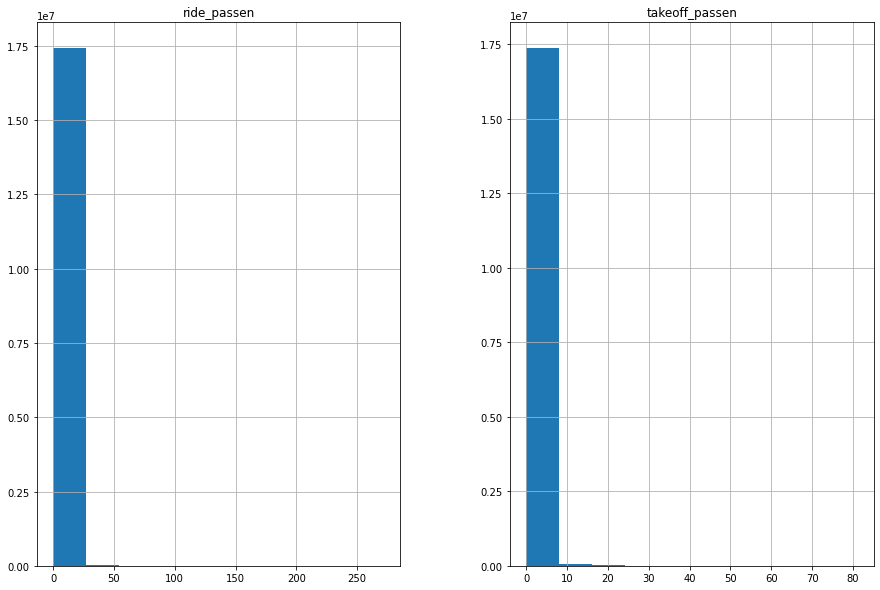

In [ ]:
## 히스토그램
train_melt[['ride_passen', 'takeoff_passen']].hist()

In [ ]:
train_melt[['ride_passen', 'takeoff_passen']].describe()

,ride_passen,takeoff_passen
count,1.744777e+07,1.744777e+07
mean,7.163604e-01,3.693364e-01
std,2.554076e+00,1.362143e+00
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,2.720000e+02,8.100000e+01


* mean값과 50%(중위값) 차이가 크므로 왜곡정도가 심하다

In [ ]:
## 로그변환
train_passen = train_melt[['ride_passen', 'takeoff_passen']]
train_passen['ride_passen_log'] = np.log1p(train_passen['ride_passen'])
train_passen['takeoff_passen_log'] = np.log1p(train_passen['takeoff_passen'])
train_passen.head(13)

,ride_passen,takeoff_passen,ride_passen_log,takeoff_passen_log
0,0.0,0.0,0.000000,0.000000
1,1.0,0.0,0.693147,0.000000
2,1.0,0.0,0.693147,0.000000
3,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000
5,0.0,0.0,0.000000,0.000000
6,0.0,0.0,0.000000,0.000000
7,1.0,0.0,0.693147,0.000000
8,0.0,0.0,0.000000,0.000000
9,0.0,0.0,0.000000,0.000000


In [ ]:
## 표준화
from sklearn.preprocessing import StandardScaler

train_passen = train_passen[['ride_passen_log', 'takeoff_passen_log']].values
train_passen_scaled = StandardScaler().fit_transform(train_passen)
train_passen_scaled

array([[-0.50058079, -0.40547239],
       [ 0.72676016, -0.40547239],
       [ 0.72676016, -0.40547239],
       ...,
       [-0.50058079, -0.40547239],
       [-0.50058079, -0.40547239],
       [-0.50058079, -0.40547239]])

#### c. Kmeans

In [ ]:
## Kmeans
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
## K 정하기 (결과를 시각화해서 inertia 의 감소가 완만해지는 부분)
# wcss=[]
# ks = range(2,10)

# for k in ks:
#     kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=0).fit(train_passen_scaled)
#     wcss.append(kmeans.inertia_)
    
# plt.plot(ks, wcss) # 3 또는 5 선택

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(train_passen_scaled)

train_melt['kmeans_labels'] = kmeans_labels
train_melt.groupby('kmeans_labels')['kmeans_labels'].count()

kmeans_labels
0    12797055
1     2064976
2     2585735
Name: kmeans_labels, dtype: int64

In [ ]:
## 로그변환X
# train_df['kmeans_labels'] = kmeans_labels
# train_df.groupby('kmeans_labels')['kmeans_labels'].count()

* 로그변환했을 떼가 값이 더 균일하게 분배

#### d. 군집화 평가

In [ ]:
# ## 실루엣 스코어
# silhouette_score(train_passen_scaled, kmeans_labels)

KeyboardInterrupt: ignored

In [ ]:
## 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [ ]:
visualize_silhouette([3,4,5,6], train_passen_scaled)

### (2) 각 집단의 특징 정의

In [ ]:
언제 끝나..멈춰..제발

## [2] 휴일(추석)에 해당되는 데이터 분석

* 추석에 이어지는 주말인 15일 포함
* 개천절, 한글날은 연속휴일이 아니므로 애매한 데이터일 것 같아서 보류, 수요일 저녁 타임도 보류 

#### (1) 휴일(추석)에 해당되는 데이터 추출

In [ ]:
## 추석
train_holiday = train[(train['date']>='2019-09-12') & (train['date']<='2019-09-15')]
bus_bts_holiday = bus_bts[(bus_bts['geton_date']>='2019-09-12') & (bus_bts['geton_date']<='2019-09-15')]
print(train_holiday.tail())
print(train_holiday.shape)

In [ ]:
bus_bts_holiday.tail()

In [ ]:
train_holiday.Weekdays.unique()

## [2] 휴일 승하차 인구 클러스터링

* date: 15, 16, 17, 18, 19로 인코딩
* bus_route_id
* in_out: 0, 1로 인코딩
* station_code: station_name은 같은 맞은편 장소라도 이름이 다르므로 제외
* latitude,	longitude: 좌표 제외
* 

##### (사용할 데이터)

In [ ]:
train_holiday.columns

In [ ]:
##train
train_holiday[['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', '18~20_ride']].hist()

### (1) histgram

## [2] 승하차 인원이 많은 정류소(노선), 시간, ID 파악 

### (1) 정류소(노선)

In [ ]:
## train
# 시간 별이 아니므로 6시~12까지 전부 합치기(열 덧셈)
train_holiday['x~y_ride'] = train_holiday['6~7_ride']+train_holiday['7~8_ride']+train_holiday['8~9_ride']+train_holiday['9~10_ride']+train_holiday['10~11_ride']+train_holiday['11~12_ride']
train_holiday['x~y_takeoff'] = train_holiday['6~7_takeoff']+train_holiday['7~8_takeoff']+train_holiday['8~9_takeoff']+train_holiday['9~10_takeoff']+train_holiday['10~11_takeoff']+train_holiday['11~12_takeoff']

train_station_name_value_ride = train_holiday.groupby(['station_name'])['x~y_ride'].count()
train_station_name_value_takeoff = train_holiday.groupby(['station_name'])['x~y_takeoff'].sum()

train_station_name_value_ride#.head(15)

In [ ]:
## train에서 추석기간동안 승하차가 많은 순위
bus_bts_station_name_value = bus_bts_holiday['geton_station_name'].value_counts()
bus_bts_station_name_value.head(15)

In [ ]:
bus_bts_holiday['getoff_station_name'].value_counts().head(15)

In [ ]:
## 만석을 채운 시간대
crowd67 = train_holiday[(train_holiday['6~7_ride']>=27) | (train_holiday['7~8_ride']>=27) | (train_holiday['8~9_ride']>=27) | (train_holiday['9~10_ride']>=27) | (train_holiday['10~11_ride']>=27) | (train_holiday['11~12_ride']>=27)]
crowd67.shape

In [ ]:
crowd67.station_name.nunique()

In [ ]:
# 시간 별 승차인원
aggs = {'6~7_ride':'sum', '7~8_ride':'sum', '8~9_ride':'sum', '9~10_ride':'sum', '10~11_ride':'sum', '11~12_ride':'sum'}
crowd67.groupby('station_name').agg(aggs)

In [ ]:
# 6~7시동안 '요일별' 승차인원
crowd67.groupby(['Weekdays', 'station_name'])['6~7_ride'].sum()